## 作業
在鐵達尼資料集中，今天我們專注觀察變數之間的相關性，以Titanic_train.csv 中，首先將有遺失值的數值刪除，並回答下列問題。
* Q1: 透過數值法計算  Age 和  Survived  是否有相關性?
* Q2:透過數值法計算  Sex 和 Survived  是否有相關性?
* Q3: 透過數值法計算  Age 和  Fare 是否有相關性?   
* 提示:    
1.產稱一個新的變數 Survived_cate ，資料型態傳換成類別型態      
2.把題目中的 Survived 用 Survived_cate 來做分析       
3.首先觀察一下這些變數的資料型態後，再來想要以哪一種判斷倆倆的相關性。     


In [1]:
# import library
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import math
import statistics
import seaborn as sns
from IPython.display import display

import pingouin as pg
import researchpy   
%matplotlib inline

## 讀入資料

In [2]:
df_train = pd.read_csv("Titanic_train.csv")
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [3]:
df_train[df_train.isnull().values == True]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [4]:
## 這邊我們做一個調整，把 Survived 變成離散型變數 Survived_cate

In [5]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_train['Survived_cate'] = df_train['Survived'].astype('object')
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    891 non-null    int64  
 1   Survived       891 non-null    int64  
 2   Pclass         891 non-null    int64  
 3   Name           891 non-null    object 
 4   Sex            891 non-null    object 
 5   Age            714 non-null    float64
 6   SibSp          891 non-null    int64  
 7   Parch          891 non-null    int64  
 8   Ticket         891 non-null    object 
 9   Fare           891 non-null    float64
 10  Cabin          204 non-null    object 
 11  Embarked       889 non-null    object 
 12  Survived_cate  891 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB
None


###  Q1: 透過數值法計算  Age 和  Survived  是否有相關性?


Answer : Age 和 Survived 幾乎沒有相關性

In [6]:
!pip install pingouin
import pingouin as pg

In [7]:
# 離散與連續

aov = pg.anova(dv='Age',between='Survived_cate',data =df_train,detailed=True )
aov

,Source,SS,DF,MS,F,p-unc,np2
0,Survived_cate,897.187582,1,897.187582,4.271195,0.039125,0.005963
1,Within,149559.448362,712,210.055405,NaN,NaN,NaN


In [8]:
etaSq = aov.SS[0]/(aov.SS[0]+aov.SS[1])

In [9]:
def judge_etaSq(etaSq):
    if etaSq <.01:
        qual ='Negligible'
    elif etaSq <.06:
        qual ='Small'
    elif etaSq <.14:
        qual ='Medium'
    else :
        qual ='Large'
    return(qual)
judge_etaSq(etaSq)

'Negligible'

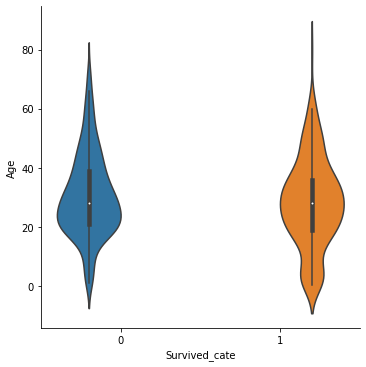

In [10]:
gc = sns.catplot(x = 'Survived_cate',y ='Age',data=df_train,hue='Survived_cate',kind='violin')

A1 : Age 和 Survived 幾乎沒有相關性

### Q2:透過數值法計算  Sex 和 Survived  是否有相關性?


Answer: Sex 和 Survived_cate，呈高度相關

In [11]:
# 離散與離散
conTable = pd.crosstab(df_train['Sex'],df_train['Survived_cate'])
conTable

Survived_cate,0,1
Sex,,
female,81,233
male,468,109


In [24]:
df = min(conTable.shape[0],conTable.shape[1])-1
df

1

In [13]:
cross, res =researchpy.crosstab(df_train['Sex'],df_train['Survived_cate'],test='chi-square')
res

,Chi-square test,results
0,Pearson Chi-square ( 1.0) =,263.0506
1,p-value =,0.0000
2,Cramer's phi =,0.5434


In [14]:
print("Cramer's value is",res.loc[2,'results'])

Cramer's value is 0.5434


In [25]:
## 寫一個副程式判斷相關性的強度
def judgment_CramerV(df,V):
    if df == 1:
        if V < 0.10:
            qual = 'negligible'
        elif V < 0.30:
            qual = 'small'
        elif V < 0.50:
            qual = 'medium'
        else:
            qual = 'large'
    elif df == 2:
        if V < 0.07:
            qual = 'negligible'
        elif V < 0.21:
            qual = 'small'
        elif V < 0.35:
            qual = 'medium'
        else:
            qual = 'large'
    elif df == 3:
        if V < 0.06:
            qual = 'negligible'
        elif V < 0.17:
            qual = 'small'
        elif V < 0.29:
            qual = 'medium'
        else:
            qual = 'large'
    elif df == 4:
        if V < 0.05:
            qual = 'negligible'
        elif V < 0.15:
            qual = 'small'
        elif V < 0.25:
            qual = 'medium'
        else:
            qual = 'large'
    else:
        if V < 0.05:
            qual = 'negligible'
        elif V < 0.13:
            qual = 'small'
        elif V < 0.22:
            qual = 'medium'
        else:
            qual = 'large'
    return(qual)

judgment_CramerV(df,res.loc[2,'results'])

'large'

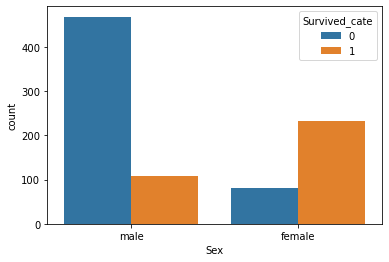

In [26]:
g= sns.countplot(x= 'Sex',hue='Survived_cate',data =df)

### Q3: 透過數值法計算  Age 和  Fare 是否有相關性?  

Answer: Age 和 Fare，幾乎毫無相關姓

In [19]:
# 連續與連續
complete_df = df_train[['Age','Fare']].dropna()
complete_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     714 non-null    float64
 1   Fare    714 non-null    float64
dtypes: float64(2)
memory usage: 16.7 KB


In [22]:
corr, _=stats.pearsonr(complete_df['Age'],complete_df['Fare'])
corr

0.09606669176903906

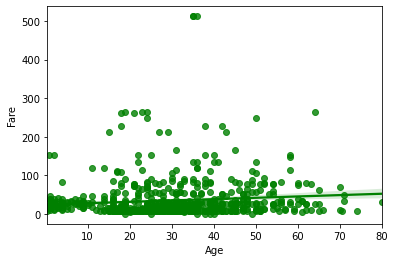

In [23]:
g = sns.regplot(x= 'Age',y='Fare',data = complete_df,color='g')